In [1]:
import sys
sys.path.append('../')
from icaviz.plotting import *
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import cm
import matplotlib
import scipy

from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.compare import *
from pymodulon.io import *


pd.options.display.max_columns = 999 

In [2]:
#format figures
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#Also, if you want your axes lines to be true black, and not this weird dark gray:
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['ytick.color'] = 'black'

In [3]:
DATA_DIR = '../data/precise2/'
PRECISE_DIR = '../data/precise/'
GENE_DIR = '../data/annotation/'
gene_info = pd.read_csv(GENE_DIR+'gene_info.csv', index_col =0)

In [4]:
ica_data = load_json_model(DATA_DIR+'precise2.json.gz')

# DIMA Histogram

In [14]:
rep_list = list(ica_data.sample_table.reset_index().groupby(["full_name"])['index'].apply(list))


In [15]:
df_dima = pd.read_csv('./data/dima_combined_final.csv', index_col=0)

In [16]:
sns.set_style('ticks')

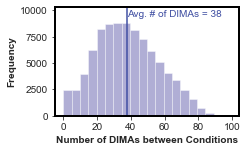

In [17]:
dima_list = df_dima.values.tolist()
dima_list = list(itertools.chain.from_iterable(dima_list))
dima_list = [x for x in dima_list if str(x) != 'nan']

from statistics import mean 
dima_mean = int(round(mean(dima_list),0))


fig, ax = plt.subplots(figsize = (3.3,2))

sns.distplot(dima_list, kde=False, bins=20, color='#3a3596')
ax.axvline(dima_mean, 0,1, color = '#3F4EA2')
ax.text(dima_mean, 9400, 'Avg. # of DIMAs = '+str(dima_mean), color='#3F4EA2')

ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')

ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)
ax.set_ylim(0,10300)

ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_xlabel('Number of DIMAs between Conditions', fontweight ='bold' )
plt.savefig('./fig3/dimas_histogram.pdf', dpi = 600, bbox_inches = 'tight')

In [18]:
dima_collapse = pd.melt(df_dima, ignore_index=False).dropna().reset_index().rename(columns={'index':'cond1', 'variable':'cond2', 'value':'Number of DIMAs'})
dima_collapse['cond1'] = dima_collapse['cond1'].str.replace('_',':')
dima_collapse['cond2'] = dima_collapse['cond2'].str.replace('_',':')
dima_collapse = dima_collapse[dima_collapse['cond1'] != dima_collapse['cond2']]
dima_collapse['cond1_cond2'] = dima_collapse['cond1']+"_"+dima_collapse['cond2']

dima_collapse.head()

,cond1,cond2,Number of DIMAs,cond1_cond2
1,42c:42c:ale1,42c:42c:ale10,20.0,42c:42c:ale1_42c:42c:ale10
2,42c:42c:ale1,42c:42c:ale2,41.0,42c:42c:ale1_42c:42c:ale2
3,42c:42c:ale10,42c:42c:ale2,22.0,42c:42c:ale10_42c:42c:ale2
4,42c:42c:ale1,42c:42c:ale3,40.0,42c:42c:ale1_42c:42c:ale3
5,42c:42c:ale10,42c:42c:ale3,20.0,42c:42c:ale10_42c:42c:ale3


In [19]:
degs = pd.read_csv('./data/degs_combined.csv', index_col=0)
degs_collapse = pd.melt(degs, ignore_index=False).dropna().reset_index().rename(columns={'index':'cond1', 'variable':'cond2','value':'Number of DEGs'})
degs_collapse['cond1'] = degs_collapse['cond1'].str.replace('_',':')
degs_collapse['cond2'] = degs_collapse['cond2'].str.replace('_',':')
degs_collapse = degs_collapse[degs_collapse['cond1'] != degs_collapse['cond2']]
degs_collapse['cond1_cond2'] = degs_collapse['cond1']+"_"+degs_collapse['cond1']

degs_collapse.head()

,cond1,cond2,Number of DEGs,cond1_cond2
0,control:wt:glc,fur:wt:dpd,659.0,control:wt:glc_control:wt:glc
1,control:wt:glc,fur:wt:fe,54.0,control:wt:glc_control:wt:glc
2,fur:wt:dpd,fur:wt:fe,714.0,fur:wt:dpd_fur:wt:dpd
3,control:wt:glc,fur:delfur:dpd,566.0,control:wt:glc_control:wt:glc
4,fur:wt:dpd,fur:delfur:dpd,42.0,fur:wt:dpd_fur:wt:dpd


In [20]:
degs_collapse2 = pd.melt(degs, ignore_index=False).dropna().reset_index().rename(columns={'index':'cond1', 'variable':'cond2','value':'Number of DEGs'})
degs_collapse2['cond1'] = degs_collapse2['cond1'].str.replace('_',':')
degs_collapse2['cond2'] = degs_collapse2['cond2'].str.replace('_',':')
degs_collapse2 = degs_collapse2[degs_collapse2['cond1'] != degs_collapse2['cond2']]
degs_collapse2['cond1_cond2'] = degs_collapse2['cond2']+"_"+degs_collapse2['cond1']

degs_collapse2.head()

,cond1,cond2,Number of DEGs,cond1_cond2
0,control:wt:glc,fur:wt:dpd,659.0,fur:wt:dpd_control:wt:glc
1,control:wt:glc,fur:wt:fe,54.0,fur:wt:fe_control:wt:glc
2,fur:wt:dpd,fur:wt:fe,714.0,fur:wt:fe_fur:wt:dpd
3,control:wt:glc,fur:delfur:dpd,566.0,fur:delfur:dpd_control:wt:glc
4,fur:wt:dpd,fur:delfur:dpd,42.0,fur:delfur:dpd_fur:wt:dpd


In [21]:
df_com = pd.concat([dima_collapse.merge(degs_collapse, on='cond1_cond2'), dima_collapse.merge(degs_collapse2, on='cond1_cond2')],axis=0)

df_com.head()

,cond1_x,cond2_x,Number of DIMAs,cond1_cond2,cond1_y,cond2_y,Number of DEGs
0,abx:media:camhb:cef,abx:media:camhb:ctrl,0.0,abx:media:camhb:cef_abx:media:camhb:ctrl,abx:media:camhb:ctrl,abx:media:camhb:cef,220.0
1,abx:media:camhb:cipro,abx:media:camhb:ctrl,9.0,abx:media:camhb:cipro_abx:media:camhb:ctrl,abx:media:camhb:ctrl,abx:media:camhb:cipro,352.0
2,abx:media:camhb:cef,abx:media:camhb:mero,0.0,abx:media:camhb:cef_abx:media:camhb:mero,abx:media:camhb:mero,abx:media:camhb:cef,100.0
3,abx:media:camhb:cipro,abx:media:camhb:mero,6.0,abx:media:camhb:cipro_abx:media:camhb:mero,abx:media:camhb:mero,abx:media:camhb:cipro,257.0
4,abx:media:camhb:cef,abx:media:camhb:trisulf,0.0,abx:media:camhb:cef_abx:media:camhb:trisulf,abx:media:camhb:trisulf,abx:media:camhb:cef,84.0


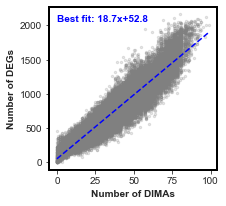

In [22]:
fig, ax = plt.subplots(figsize=(3,3))

y=df_com["Number of DEGs"]
x=df_com["Number of DIMAs"]
ax.scatter(x=x, y=y, color='gray', alpha=.2, s=6)

#best fit line
m, b = np.polyfit(x, y, 1)
ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
        ls = '--', color='blue')
ax.text(0,2050, 'Best fit: '+str(round(m,1))+'x+'+str(round(b,1)),
        fontweight ='bold', color='blue')

#format
ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')
ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

ax.set_xlabel('Number of DIMAs', fontweight ='bold')
ax.set_ylabel('Number of DEGs', fontweight ='bold' )
plt.savefig('./fig3/degs_versus_dima.pdf', dpi = 600, bbox_inches = 'tight')

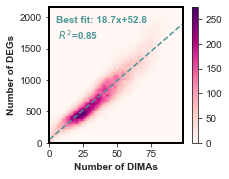

In [24]:
# heat version

fig, ax = plt.subplots(figsize=(3,2.5))

y=df_com["Number of DEGs"]
x=df_com["Number of DIMAs"]

# code from https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
scatterheat = ax.imshow(heatmap.T, extent=extent, origin='lower', 
                        aspect='auto', cmap='RdPu')
plt.colorbar(scatterheat)

# best fit line
m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)

# R^2 calc
y_bar = y.mean()
y_pred = [m*x_i+b for x_i in x]
SS_TOT = sum([(y_i-y_bar)**2 for y_i in y])
SS_RES = sum((y - y_pred)**2)
R_2 = 1- SS_RES/SS_TOT

# plot fit line
ax.plot(np.unique(x), m*(np.unique(x))+b,
        ls = '--', color='#4a9696')
ax.text(5,1650, 'Best fit: '+str(round(m,1))+'x+'+str(round(b,1))+'\n $R^2$='+str(round(R_2,2)),
        fontweight ='bold', color='#4a9696')

#format
ax.spines['top'].set_color('0'); ax.spines['bottom'].set_color('0')
ax.spines['left'].set_color('0'); ax.spines['right'].set_color('0')
ax.spines['top'].set_linewidth(2); ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2); ax.spines['right'].set_linewidth(2)

ax.set_xlabel('Number of DIMAs', fontweight ='bold')
ax.set_ylabel('Number of DEGs', fontweight ='bold' )
plt.savefig('./fig3/degs_versus_dima.pdf', dpi = 600, bbox_inches = 'tight')